<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Cognitive Neuroscience Course</font></span>
        <span><br><font size=3>Summer 1404</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Hands-on fMRI</font><br>
        <hr />
        <font size=3>Is there any <font color=red>؟</font> Question <font color=red>?</font> , Feel free to ask me  <a href="mailto:mohammad.nili@ut.ac.ir">mohammad nili</a> :)))<br></font><br>
    </div>
</div>

<pre>
Read / manipulation Data & statistics
$ ( click to jump on task )
.
├── Data Manipulation
│   ├── Task-fMRI data headers
│   └── Load Data <a href="#t1">task 1 - Visualize middle axis of T1w image.</a>
│   
├── General Linear Model (GLM)
│   ├── Event Matrix: <a href="#t2">task 2 -  EV generation.</a>
│   ├── Designt matrix: <a href="#t3">task 3 - Change hrf and drift models.</a>
│   ├── Model Fitting: <a href="#t4">task 4 - Fit GLM model.</a>
│   └── Compare Contrast: <a href="#t5">task 5 - LVF and RVF contrast of LGN.</a>
|       
└── Visualization the results
    └── z-score: <a href="#t6">task 6 - overlay and visualize the results.</a>


</pre>

<font color=green>Use :</font> ``` ! conda install pandas numpy matplotlib ... ```

or

<font color=red> use :</font> ``` ! pip install pandas numpy matplotlib ...```

In [25]:
path='Data/preprocessed'
from nilearn.glm.first_level import make_first_level_design_matrix
import matplotlib.pyplot as plt
import nibabel as nib
import nilearn as ni
import pandas as pd
import numpy as np
from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting

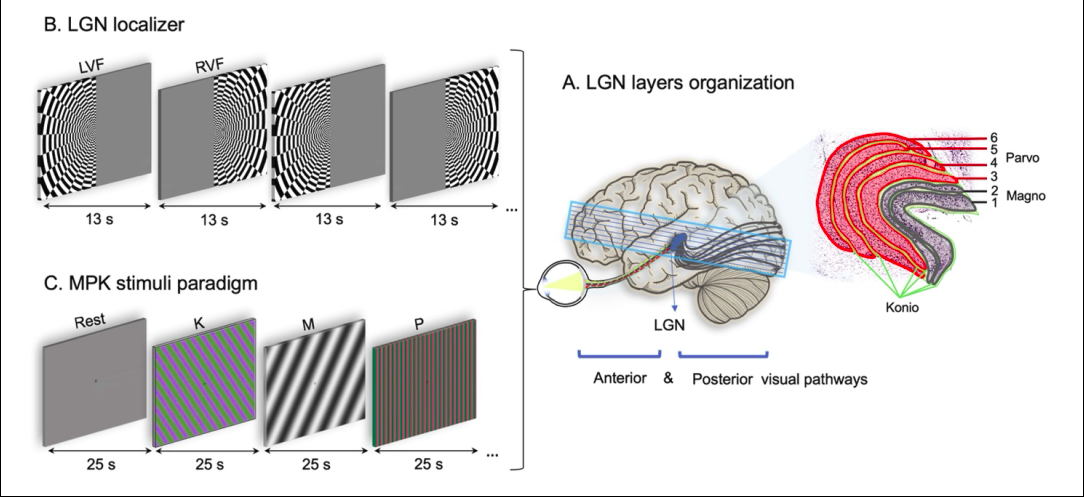

# Data Manipulation
## Task-fMRI data headers
#### localizer:
	"EchoTime": 0.04,
	"RepetitionTime": 2.5,
      Dimensions:        122 x 122 x 22 x 120
      Voxel size:        1.83607 x 1.83607 x 1.89 x 2.5
    
    local_start: 8 sec
    
#### Main Task:
	"EchoTime": 0.04,
	"RepetitionTime": 2.5,
       Dimensions:        122 x 122 x 21 x 250
       Voxel size:        1.83607 x 1.83607 x 1.89 x 2.5

    main_start magno: 32 sec

## load Data

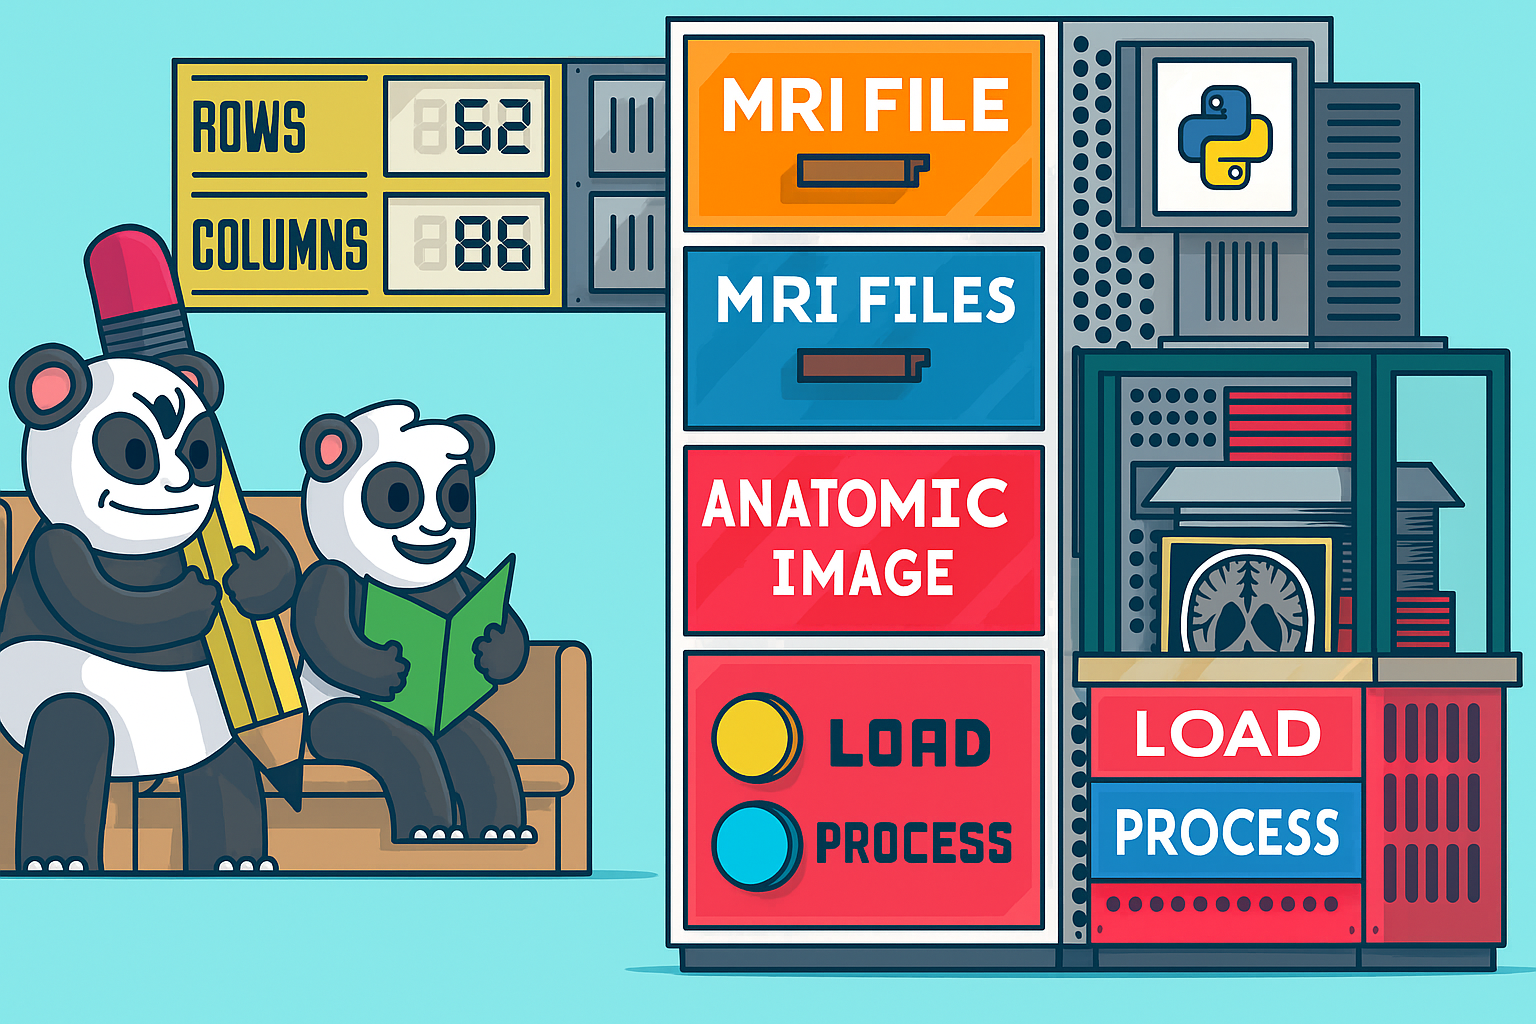

In [26]:
subj='sub-05'
t1 = nib.load(f"{path}/{subj}_desc-brain.nii.gz")

fmri1_loc = nib.load(f"{path}/{subj}_task-rest_run-1_space-T1w_desc-preproc_bold.nii.gz")

In [27]:
# Get data shapes
t1_data = t1.get_fdata()
bold_data = fmri1_loc.get_fdata()
print('T1w shape:', t1_data.shape)
print('BOLD shape:', bold_data.shape)

T1w shape: (176, 256, 256)
BOLD shape: (78, 92, 74, 120)


<hr />
<font color=red size=5 id="t1"> 🧠 Challenge 1 :</font>

Plot the middle slice of the T1-weighted image.
Use `matplotlib.pyplot.imshow` and display the middle axial slice.

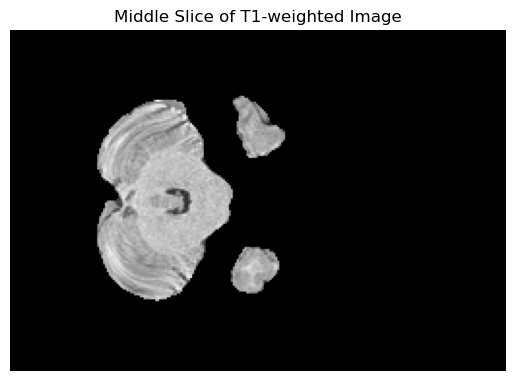

In [28]:
# Your code here to plot a slice from t1_data
# Hint: Use t1_data.shape to find the middle index
slice_index = t1_data.shape[2] // 2  # Middle slice along the z-axis
plt.imshow(t1_data[:, :, slice_index], cmap='gray')
plt.title('Middle Slice of T1-weighted Image')
plt.axis('off')
plt.show()

# General Linear Model
### Event Matrix generation

<hr />
<font color=red size=5 id="t2"> 🧠 Challenge 2 :</font>

Complete below code to make Event matrix...

In [29]:
# Parameters
TR = 2.5  # Repetition time in seconds
num_volumes = 120  # Total number of volumes
block_duration = 13  # Block duration in seconds
task_start_time = 8.25  # Task starts after 8 seconds 
total_time = num_volumes * TR  # Total fMRI scan time

# Time points corresponding to each volume
onset_times = np.arange(0, total_time, TR)

# Initialize the design matrix with zeros and add a duration column
events_matrix = pd.DataFrame({'onset': onset_times, 
                              'trial_type': np.zeros(len(onset_times)),
                              'duration': np.ones(len(onset_times)) * TR})  # Each volume is TR seconds long

# Loop through time points and alternate task blocks between 1 and 2
current_time = task_start_time
task_state = 1  # Start with Task_Block 1

while current_time < total_time:
    block_end_time = current_time + block_duration
    if block_end_time > total_time:  # Make sure we don't go beyond the fMRI duration
        block_end_time = total_time

    # Set the task block to the current task state (alternating between 1 and 2)
    events_matrix.loc[(events_matrix['onset'] >= current_time) & (events_matrix['onset'] < block_end_time), 'trial_type'] = task_state
    
    # Alternate task state between 1 and 2
    task_state = 2 if task_state == 1 else 1

    # Move to the next block
    current_time = block_end_time
    
events_matrix.loc[120-7:,'trial_type'] = 0
events_matrix['trial_type'] = events_matrix['trial_type'].astype(str)
events_matrix

onset trial_type  duration
0      0.0        0.0       2.5
1      2.5        0.0       2.5
2      5.0        0.0       2.5
3      7.5        0.0       2.5
4     10.0        1.0       2.5
..     ...        ...       ...
115  287.5        0.0       2.5
116  290.0        0.0       2.5
117  292.5        0.0       2.5
118  295.0        0.0       2.5
119  297.5        0.0       2.5

[120 rows x 3 columns]

In [30]:
# Your code results must be like above output.
# Hint: block_duration, task_state = 2 if task_state == 1 else 1

In [31]:
events_matrix.head(20)

onset trial_type  duration
0     0.0        0.0       2.5
1     2.5        0.0       2.5
2     5.0        0.0       2.5
3     7.5        0.0       2.5
4    10.0        1.0       2.5
5    12.5        1.0       2.5
6    15.0        1.0       2.5
7    17.5        1.0       2.5
8    20.0        1.0       2.5
9    22.5        2.0       2.5
10   25.0        2.0       2.5
11   27.5        2.0       2.5
12   30.0        2.0       2.5
13   32.5        2.0       2.5
14   35.0        1.0       2.5
15   37.5        1.0       2.5
16   40.0        1.0       2.5
17   42.5        1.0       2.5
18   45.0        1.0       2.5
19   47.5        2.0       2.5

## Design matrix

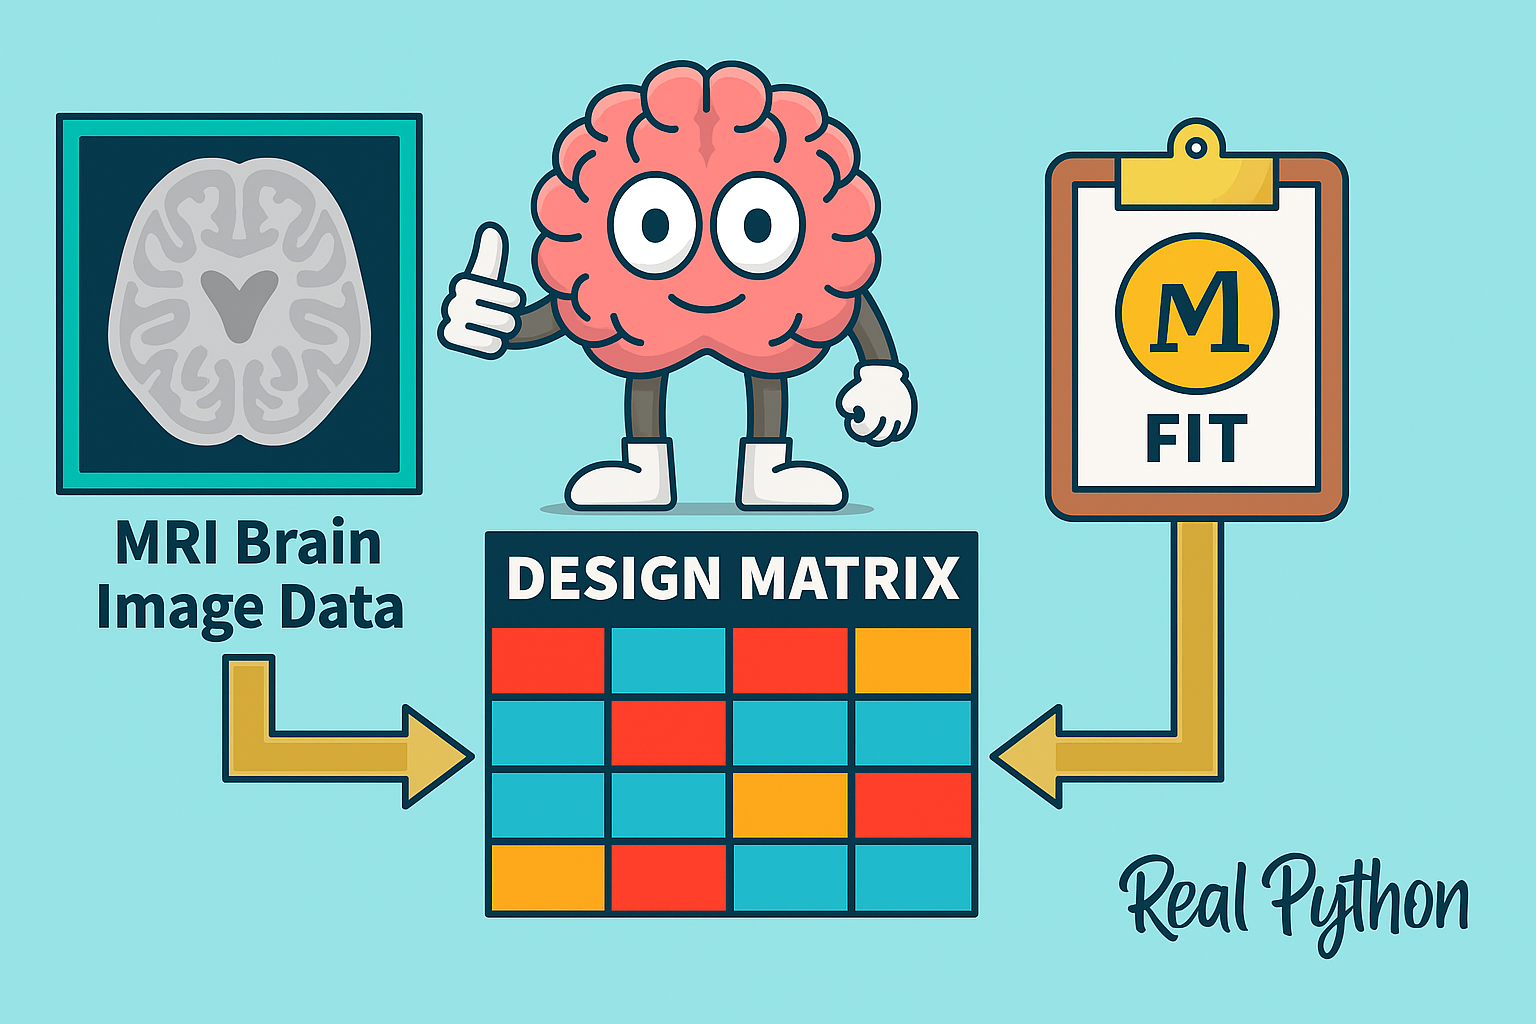

<font color=red size=5 id="t3"> 🧠 Challenge 3 :</font>

Change the `dritf_model` and `hrf_model` in your GLM and compare the results:

In [32]:
help(make_first_level_design_matrix)

Help on function make_first_level_design_matrix in module nilearn.glm.first_level.design_matrix:

make_first_level_design_matrix(frame_times, events=None, hrf_model='glover', drift_model='cosine', high_pass=0.01, drift_order=1, fir_delays=None, add_regs=None, add_reg_names=None, min_onset=-24, oversampling=50)
    Generate a design matrix from the input parameters.

    Parameters
    ----------
    frame_times : array of shape (n_frames,)
        The timing of acquisition of the scans in seconds.

    events : :obj:`pandas.DataFrame` instance,              or :obj:`str` or :obj:`pathlib.Path` to a CSV or TSV file,              or None, default=None
        Events data that describes the experimental paradigm.
        The resulting DataFrame instance must/may have these keys:

        - ``'onset'``: REQUIRED
            Column to specify the start time of each events in seconds.
            An error is raised if this key is missing.

        - ``'duration'``: REQUIRED
            Colum

In [33]:
tr = 2.5  # repetition time is 2.5 second

dsgn_mx1 =make_first_level_design_matrix(np.arange(fmri1_loc.shape[-1]) * tr,drift_model='cosine',
                                        events=events_matrix,hrf_model="glover + derivative + dispersion")

0.0  0.0_derivative  0.0_dispersion  1.0  1.0_derivative  \
0.0   0.000000        0.000000   -5.749934e-18  0.0             0.0   
2.5   0.061408        0.101480   -1.136282e-01  0.0             0.0   
5.0   0.706961        0.334237   -1.168289e-01  0.0             0.0   
7.5   1.408667        0.149464    1.166255e-01  0.0             0.0   
10.0  1.542688       -0.063549    3.632074e-03  0.0             0.0   

      1.0_dispersion  2.0  2.0_derivative  2.0_dispersion   drift_1   drift_2  \
0.0              0.0  0.0             0.0    5.258005e-18  0.129088  0.129055   
2.5              0.0  0.0             0.0    0.000000e+00  0.129000  0.128701   
5.0              0.0  0.0             0.0    0.000000e+00  0.128823  0.127995   
7.5              0.0  0.0             0.0    0.000000e+00  0.128558  0.126938   
10.0             0.0  0.0             0.0    0.000000e+00  0.128205  0.125532   

       drift_3   drift_4   drift_5   drift_6  constant  
0.0   0.129000  0.128923  0.128823  0.128701       1.0  
2.5   0.128205  0.127510  0.126619  0.125532       1.0  
5.0   0.126619  0.124700  0.122248  0.119272       1.0  
7.5   0.124252  0.120525  0.115786  0.110075       1.0  
10.0  0.121120  0.115028  0.107342  0.098168       1.0

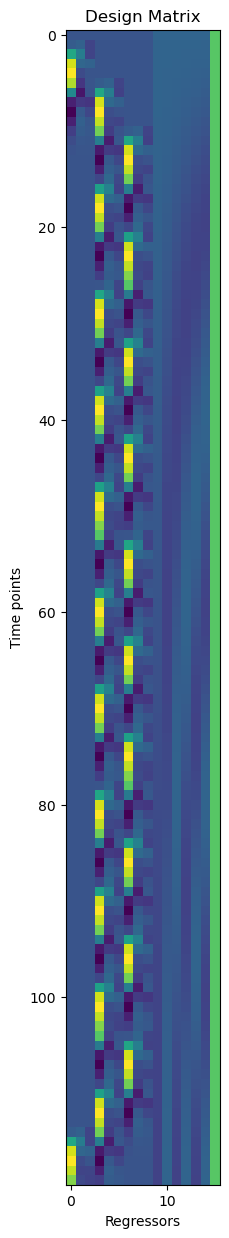

In [34]:
display(dsgn_mx1.head())
plt.figure(figsize=(20,15))
plt.imshow(dsgn_mx1)
plt.xlabel('Regressors')
plt.ylabel('Time points')
plt.title('Design Matrix')
plt.show()

## Drop confounders + fit GLM

In [35]:
confound_vars = [
    'csf', 'white_matter', 'global_signal',
    'framewise_displacement',
    't_comp_cor_00', 't_comp_cor_01', 't_comp_cor_02',
    'trans_x', 'trans_y', 'trans_z',
    'rot_x', 'rot_y', 'rot_z'
]

Let \( Y(t) \) be the observed fMRI signal at time \( t \), the GLM can be written as:

$$
Y(t) = \sum_{i=1}^{k} \beta_i \cdot X_i(t) + \varepsilon(t)
$$

Where:  
$ X_i(t) $: columns of the design matrix (task-related regressors convolved with HRF, temporal and dispersion derivatives, drift terms) </br>
$ \beta_i $: regression coefficients to be estimated </br>
$ \varepsilon(t) $: residual error at time \( t \) </br>

More specifically:

$$
Y(t) = \beta_1 \cdot h(t) + \beta_2 \cdot h'(t) + \beta_3 \cdot h''(t) + \sum_{j=1}^{J} \gamma_j \cdot D_j(t) + \varepsilon(t)
$$

Where:  
$ h(t) $: the canonical Glover hemodynamic response function (HRF) </br>
$ h'(t) $: the temporal derivative of the HRF </br>
$ h''(t) $: the dispersion derivative of the HRF </br>
$ D_j(t) $: the \( j \)-th cosine drift term </br>
$ \beta_1, \beta_2, \beta_3 $: the regression coefficients for the HRF and its derivatives </br>
$ \gamma_j $: the regression coefficients for the drift terms </br>
$ \varepsilon(t) $: residual error term </br>

<font color=red size=5 id="t4"> 🧠 Challenge 4 :</font>

Fit GLM model with and without regress out the confounder variables and compare the results

In [36]:
confounds_path = f"{path}/{subj}_task-rest_run-1_desc-confounds_timeseries.tsv"
confounds_df = pd.read_csv(confounds_path, sep='\t')

# Optional: fill NaNs (especially in FD)
confounds_df.fillna(method='bfill', inplace=True)

# Select confounds (adjust based on your needs)
selected_confounds = confounds_df[confound_vars]

# Ensure same number of timepoints
assert selected_confounds.shape[0] == fmri1_loc.shape[-1]

# Add to model
fmri_glm1 = FirstLevelModel(
    smoothing_fwhm=5,
    minimize_memory=False,
    drift_model='cosine',
    hrf_model="glover + derivative + dispersion"
)

fmri_glm1 = fmri_glm1.fit(
    fmri1_loc,
    design_matrices=dsgn_mx1,
    confounds=selected_confounds
)

/tmp/ipykernel_18085/3723511392.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confounds_df.fillna(method='bfill', inplace=True)
/tmp/ipykernel_18085/3723511392.py:21: UserWarning: If design matrices are supplied, confounds will be ignored.
  fmri_glm1 = fmri_glm1.fit(
/tmp/ipykernel_18085/3723511392.py:21: UserWarning: If design matrices are supplied, [hrf_model] will be ignored.
  fmri_glm1 = fmri_glm1.fit(


<font color=red size=5 id="t5"> 🧠 Challenge 5 :</font>

Complete bellow cell to compare between left and right hemisphere
> once the contrast of left versus right

> once the contrast of right versus left

In [87]:
contrast_val1 = np.hstack(([0, 0, 0, 1, 1, 1, -1, -1, -1], np.zeros(dsgn_mx1.shape[1]-9)))
summary_statistics_session1 = fmri_glm1.compute_contrast(contrast_val1, output_type='all')
lr_data = nib.Nifti1Image(summary_statistics_session1['z_score'].get_fdata(), summary_statistics_session1['z_score'].affine)
# nib.save(lr_data, f'{subj}_lr_z_score_less_conf.nii.gz')

contrast_val2 = np.hstack(([0, 0, 0, -1, -1, -1, 1, 1, 1], np.zeros(dsgn_mx1.shape[1]-9)))
summary_statistics_session2 = fmri_glm1.compute_contrast(contrast_val2, output_type='all')
rl_data = nib.Nifti1Image(summary_statistics_session2['z_score'].get_fdata(), summary_statistics_session2['z_score'].affine)
# nib.save(rl_data, f'{subj}_rl_z_score_less_conf.nii.gz')

In [40]:
# inside the hstack is your designt matrix columns
# Hint: just use 0 and +1 and -1

## Visulaization the Z-score result

<hr />
<font color=red size=5 id="t6"> 🧠 Challenge 6 :</font>

change the mean background image and use the fMRI data 

hint: mean across 4'th shape of data

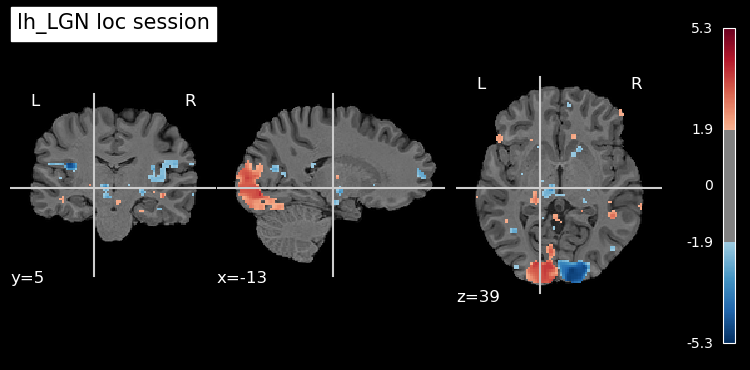

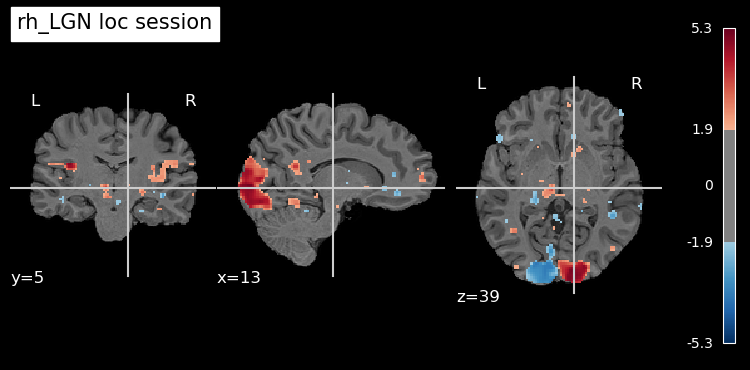

In [86]:
mean_img = nib.Nifti1Image(t1.get_fdata(), t1.affine, header=t1.header)

plotting.plot_stat_map(summary_statistics_session1['z_score'],bg_img=mean_img,cut_coords=(-13.21, 5.51, 39.30),threshold=1.9,title='lh_LGN loc session')
plotting.plot_stat_map(summary_statistics_session2['z_score'],bg_img=mean_img,cut_coords=(13.21, 5.51, 39.30),threshold=1.9,title='rh_LGN loc session')

## Data cleaning

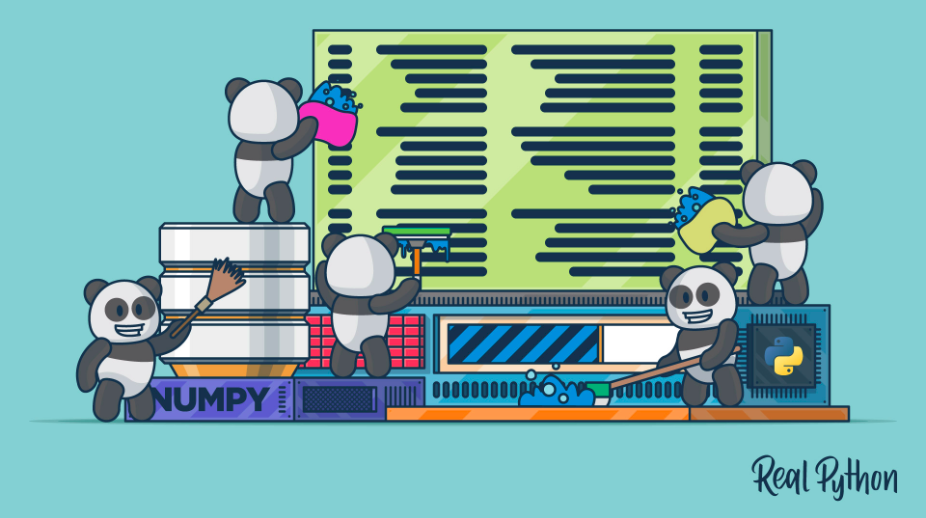

In [88]:
from scipy.ndimage import label,map_coordinates
from nilearn.image import resample_to_img  # For resampling

In [96]:
threshold = 1.96  # Change this based on your needs

lr_z_scores = lr_data.get_fdata()
rl_z_scores = rl_data.get_fdata()

# Apply threshold
# lr_thresholded = np.where(np.abs(lr_z_scores) >= threshold, lr_z_scores, 0)
lr_thresholded = np.where(lr_z_scores >= threshold, lr_z_scores, 0)
lr_zscore_thresholded = nib.Nifti1Image(lr_thresholded, lr_data.affine, lr_data.header)

rl_thresholded = np.where(rl_z_scores >= threshold, rl_z_scores, 0)
rl_zscore_thresholded = nib.Nifti1Image(rl_thresholded, rl_data.affine, rl_data.header)

## Resample to target space

In [92]:
def resample_to_target(source_nii, target_nii, order=1):
    """
    Resample a source NIfTI image to match the space (affine and shape) of a target image.
    Parameters:
        source_nii: nib.Nifti1Image
            The source image to be resampled.
        target_nii: nib.Nifti1Image
            The target image providing the reference space.
        order: int
            Interpolation order: 0 (nearest), 1 (linear), etc.
    Returns:
        numpy.ndarray
            The resampled source data in the target space.
    """
    source_data = source_nii.get_fdata()
    source_affine = source_nii.affine

    target_shape = target_nii.shape
    target_affine = target_nii.affine

    # Create a grid of voxel coordinates in the target space
    target_grid = np.meshgrid(
        np.arange(target_shape[0]),
        np.arange(target_shape[1]),
        np.arange(target_shape[2]),
        indexing='ij'
    )

    # Flatten the voxel grid to a 4xN matrix
    target_vox_coords = np.vstack([
        target_grid[0].ravel(),
        target_grid[1].ravel(),
        target_grid[2].ravel(),
        np.ones(np.prod(target_shape))
    ])

    # Convert voxel coordinates to world coordinates (RAS)
    target_world_coords = target_affine @ target_vox_coords

    # Convert world coordinates to source voxel coordinates
    inv_source_affine = np.linalg.inv(source_affine)
    source_vox_coords = inv_source_affine @ target_world_coords

    # Sample source data at target voxel coordinates
    resampled_flat = map_coordinates(
        source_data,
        source_vox_coords[:3],
        order=order,
        mode='constant',
        cval=0
    )

    # Reshape the flat result to the target shape
    resampled_data = resampled_flat.reshape(target_shape)

    return resampled_data

def apply_lgn_mask_on_zscore(zscore, lgn_path):
    """
    Resample a z-score image to match LGN mask space and apply the LGN mask.
    Saves the masked output to the given path.
    
    Parameters:
        zscore_path (str): Path to the input z-score NIfTI file.
        lgn_path (str): Path to the LGN mask NIfTI file.
        output_path (str): Path to save the masked z-score NIfTI output.
    """
    # Load z-score and LGN images
    lgn_nii = nib.load(lgn_path)

    # Clean z-score data (remove NaNs and negative values)
    zscore_data = zscore.get_fdata()
    zscore_data[np.isnan(zscore_data)] = 0
    zscore_data[zscore_data < 0] = 0

    # Resample the z-score image to match the LGN mask space
    zscore_resampled = resample_to_target(zscore, lgn_nii, order=1)

    # Generate binary LGN mask
    lgn = lgn_nii.get_fdata()
    lgn_mask = (lgn > 0.5).astype(np.float32)

    # Apply the LGN mask on the resampled z-score data
    masked_data = zscore_resampled * lgn_mask
    # print(masked_data.sum())

    # Save the result to the specified output path
    masked_nii = nib.Nifti1Image(masked_data, lgn_nii.affine, lgn_nii.header)
    plotting.plot_stat_map(masked_nii, bg_img=mean_img, figure=plt.figure(figsize=(15, 5)))
    # nib.save(masked_nii, output_path)

    # print(f"Done. Masked z-score image saved to:\n{output_path}")

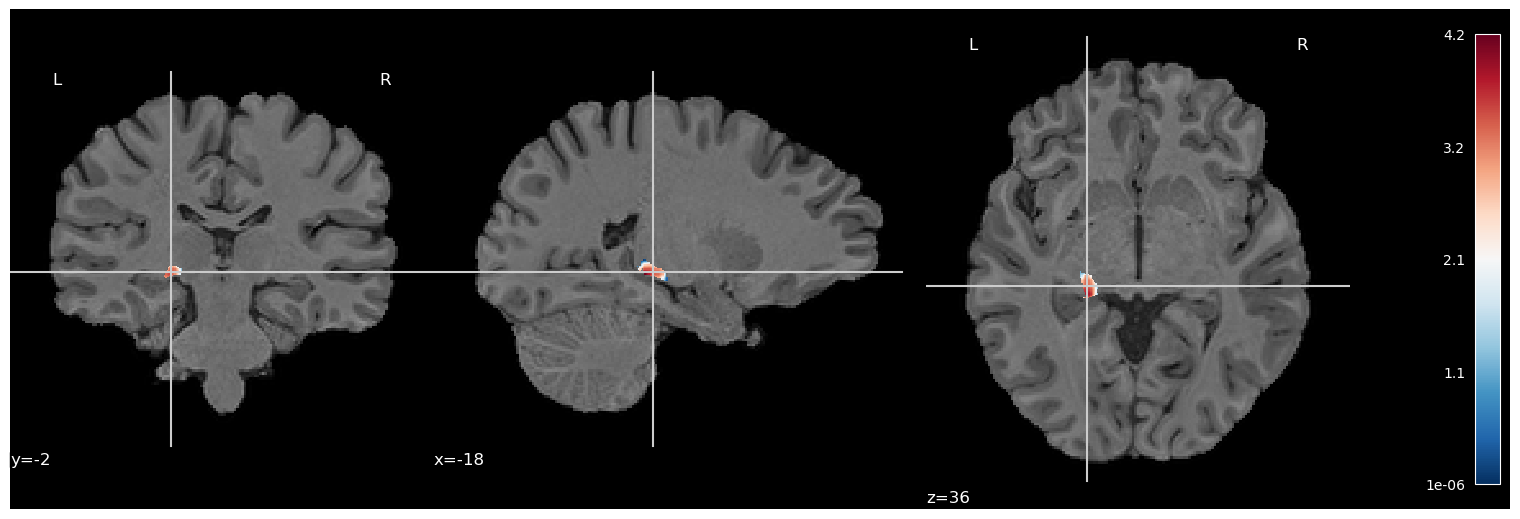

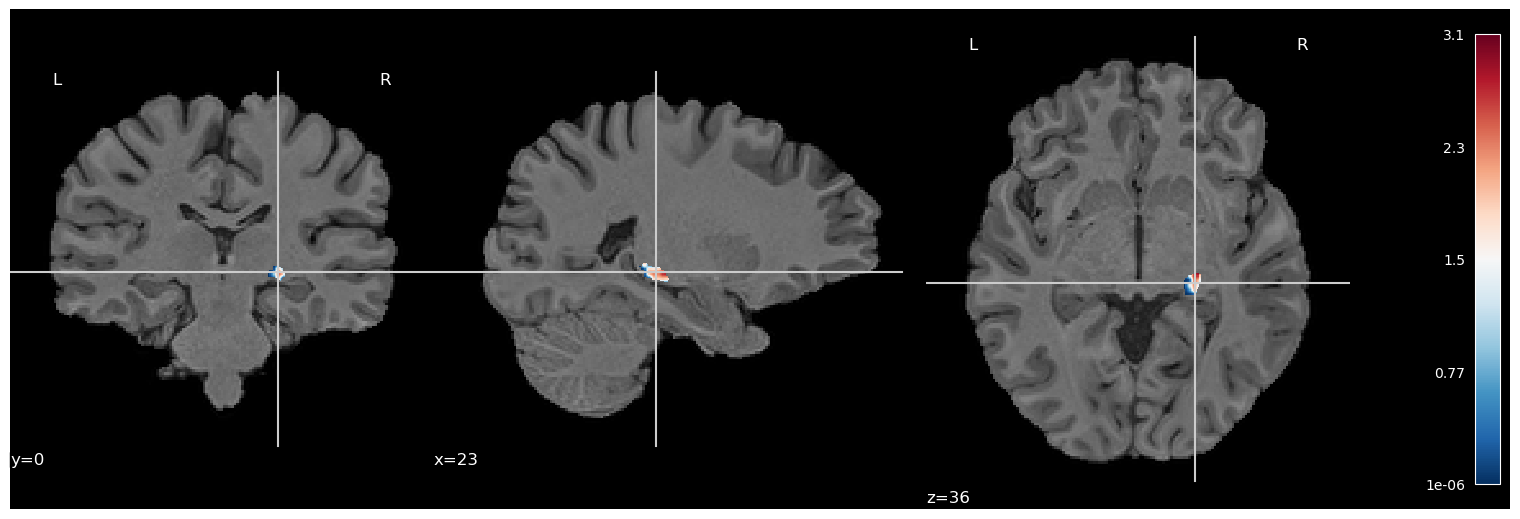

In [97]:
apply_lgn_mask_on_zscore(
    zscore=lr_zscore_thresholded,
    lgn_path=f'{path}/ROIs/lh_LGN.nii.gz',
    # output_path='sub-05_lgn_masked_zscore_resampled.nii.gz'
)
apply_lgn_mask_on_zscore(
    zscore=rl_zscore_thresholded,
    lgn_path=f'{path}/ROIs/rh_LGN.nii.gz',
)

## Overlap functional patch with anatomical ROI

/tmp/ipykernel_18085/3754537919.py:12: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")
/tmp/ipykernel_18085/3754537919.py:12: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")


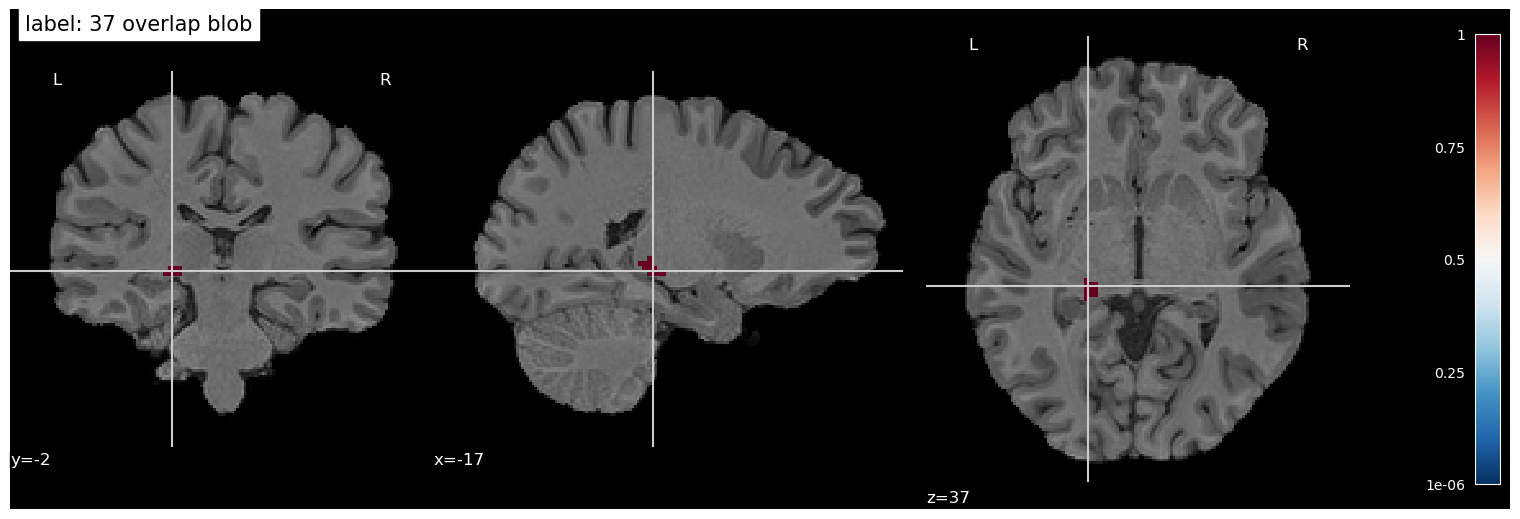

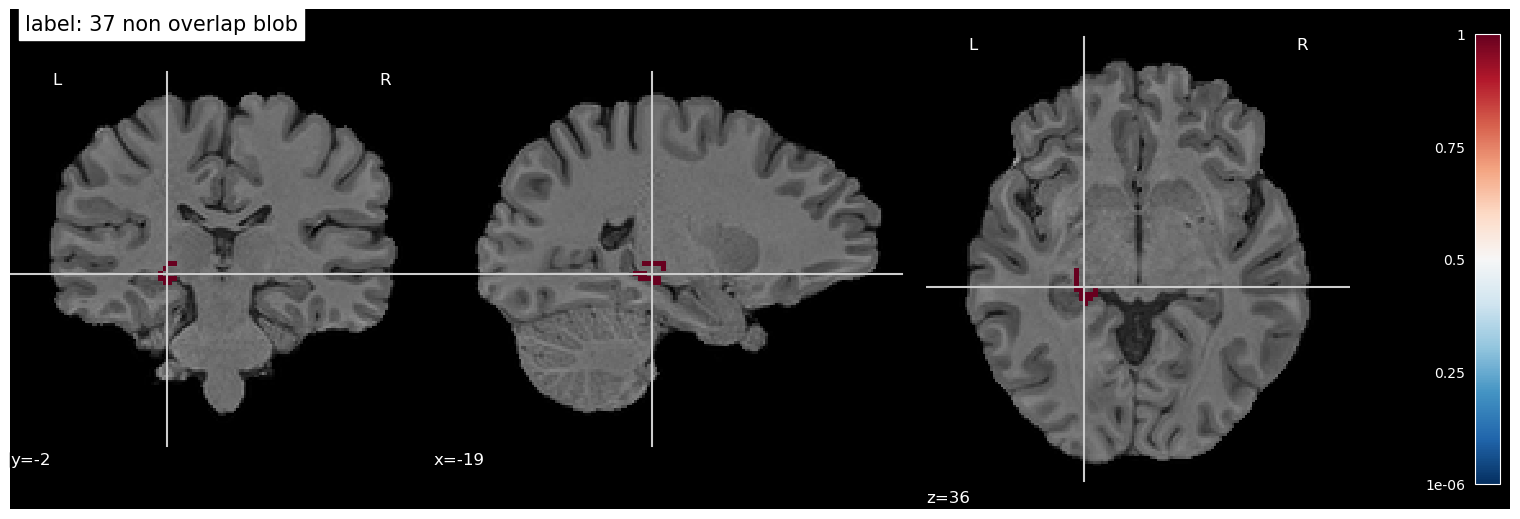

In [101]:
# Paths to the files
z_stat_path = "sub-05_lr_z_score_less_conf_thresholded.nii.gz"
lgn_mask_path = f'{path}/ROIs/lh_LGN.nii.gz'
# output_dir = "."

#  Load the z-stat image
z_stat_img = lr_zscore_thresholded
z_stat_data = z_stat_img.get_fdata()

# Load the LGN mask and resample it to match the z-stat image
lgn_mask_img = nib.load(lgn_mask_path)
resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")
resampled_lgn_mask_data = resampled_lgn_mask_img.get_fdata()

# Ensure binary mask for LGN
lgn_binary_mask = (resampled_lgn_mask_data > 0).astype(int)

# Find blobs in z_stat file
z_stat_binary = (z_stat_data != 0).astype(int)
labeled_blobs, num_blobs = label(z_stat_binary)

# Identify the label of the blob overlapping with LGN
overlap_labels = np.unique(labeled_blobs[lgn_binary_mask > 0])
overlap_labels = overlap_labels[overlap_labels > 0]  # Exclude background

if len(overlap_labels) > 0:
    for label_id in overlap_labels:
        # Extract the entire blob
        blob_mask = (labeled_blobs == label_id)

        # Extract overlapping region
        overlap_region = blob_mask & (lgn_binary_mask > 0)

        # Extract non-overlapping region of the same blob
        non_overlap_region = blob_mask & ~(lgn_binary_mask > 0)

        # Save the results
        overlap_img = nib.Nifti1Image(overlap_region.astype(int), z_stat_img.affine, z_stat_img.header)
        # nib.save(overlap_img, f"{output_dir}/overlap_blob_{label_id}.nii.gz")
        plotting.plot_stat_map(overlap_img, bg_img=mean_img, title=f'label: {label_id} overlap blob', figure=plt.figure(figsize=(15, 5)))

        non_overlap_img = nib.Nifti1Image(non_overlap_region.astype(int), z_stat_img.affine, z_stat_img.header)
        # nib.save(non_overlap_img, f"{output_dir}/non_overlap_blob_{label_id}.nii.gz")
        plotting.plot_stat_map(non_overlap_img, bg_img=mean_img, title=f'label: {label_id} non overlap blob', figure=plt.figure(figsize=(15, 5)))

else:
    pass

/tmp/ipykernel_18085/3219012804.py:12: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")
/tmp/ipykernel_18085/3219012804.py:12: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")


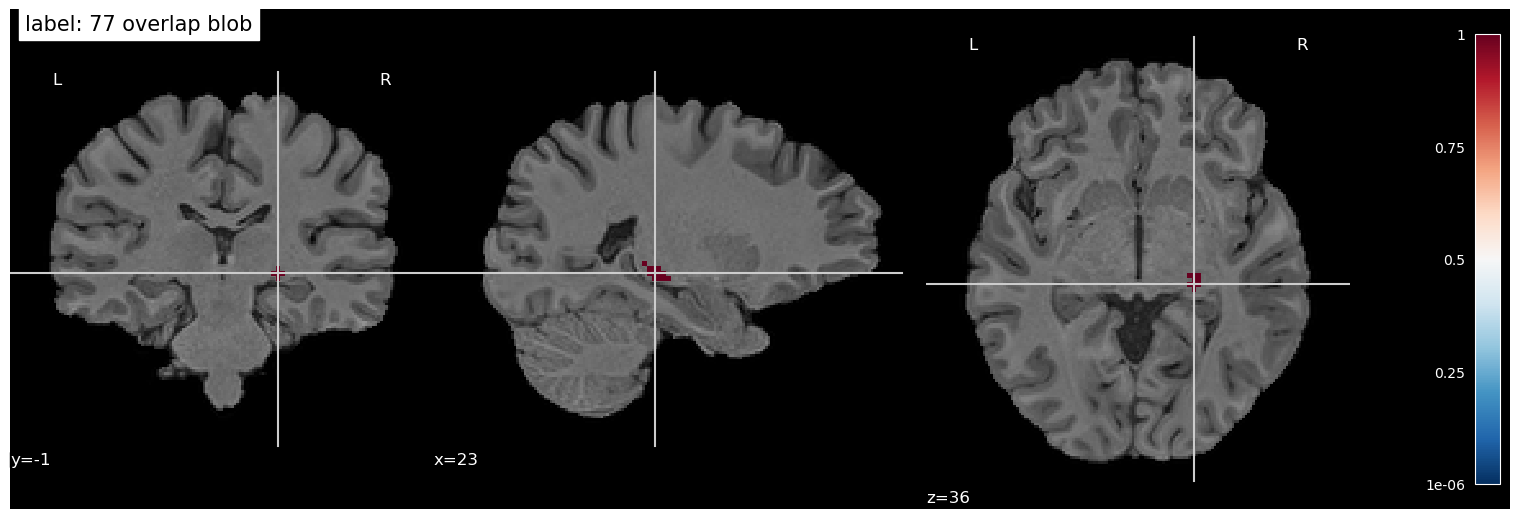

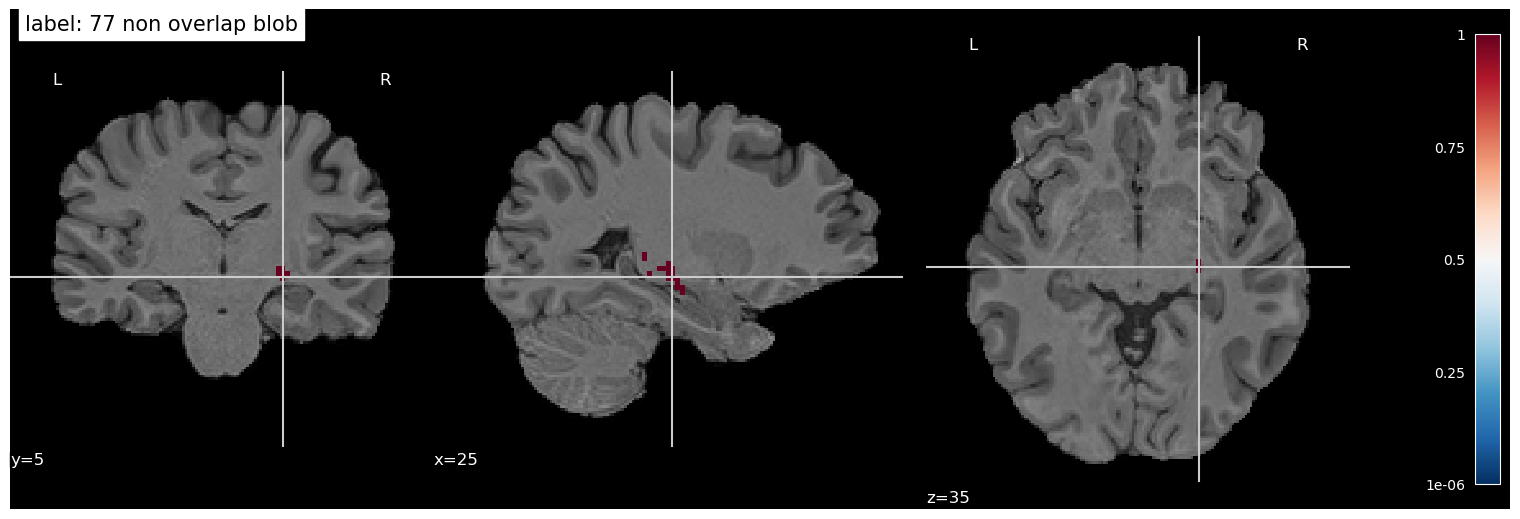

In [100]:
# Paths to the files
z_stat_path = "sub-05_lr_z_score_less_conf_thresholded.nii.gz"
lgn_mask_path = f'{path}/ROIs/rh_LGN.nii.gz'
# output_dir = "."

#  Load the z-stat image
z_stat_img = rl_zscore_thresholded
z_stat_data = z_stat_img.get_fdata()

# Load the LGN mask and resample it to match the z-stat image
lgn_mask_img = nib.load(lgn_mask_path)
resampled_lgn_mask_img = resample_to_img(lgn_mask_img, z_stat_img, interpolation="nearest")
resampled_lgn_mask_data = resampled_lgn_mask_img.get_fdata()

# Ensure binary mask for LGN
lgn_binary_mask = (resampled_lgn_mask_data > 0).astype(int)

# Find blobs in z_stat file
z_stat_binary = (z_stat_data != 0).astype(int)
labeled_blobs, num_blobs = label(z_stat_binary)

# Identify the label of the blob overlapping with LGN
overlap_labels = np.unique(labeled_blobs[lgn_binary_mask > 0])
overlap_labels = overlap_labels[overlap_labels > 0]  # Exclude background

if len(overlap_labels) > 0:
    for label_id in overlap_labels:
        # Extract the entire blob
        blob_mask = (labeled_blobs == label_id)

        # Extract overlapping region
        overlap_region = blob_mask & (lgn_binary_mask > 0)

        # Extract non-overlapping region of the same blob
        non_overlap_region = blob_mask & ~(lgn_binary_mask > 0)

        # Save the results
        overlap_img = nib.Nifti1Image(overlap_region.astype(int), z_stat_img.affine, z_stat_img.header)
        # nib.save(overlap_img, f"{output_dir}/overlap_blob_{label_id}.nii.gz")
        plotting.plot_stat_map(overlap_img, bg_img=mean_img, title=f'label: {label_id} overlap blob', figure=plt.figure(figsize=(15, 5)))

        non_overlap_img = nib.Nifti1Image(non_overlap_region.astype(int), z_stat_img.affine, z_stat_img.header)
        # nib.save(non_overlap_img, f"{output_dir}/non_overlap_blob_{label_id}.nii.gz")
        plotting.plot_stat_map(non_overlap_img, bg_img=mean_img, title=f'label: {label_id} non overlap blob', figure=plt.figure(figsize=(15, 5)))

else:
    pass

## Different Hyperparameters

In [128]:
def f(hrf_model, drift_model):
    dsgn_mx1 = make_first_level_design_matrix(np.arange(fmri1_loc.shape[-1]) * tr,drift_model=drift_model,
                                        events=events_matrix,hrf_model=hrf_model)
    
    plt.figure(figsize=(15,20))
    plt.imshow(dsgn_mx1.T)
    plt.xlabel('Time points')
    plt.ylabel('Regressors')
    plt.title('Design Matrix')
    plt.show()

    fmri_glm1 = FirstLevelModel(
        smoothing_fwhm=5,
        minimize_memory=False,
    )

    fmri_glm1 = fmri_glm1.fit(
        fmri1_loc,
        design_matrices=dsgn_mx1,
    )

    contrast_val1 = dsgn_mx1.columns.str.contains('1.0').astype(int) - dsgn_mx1.columns.str.contains('2.0').astype(int)
    summary_statistics_session1 = fmri_glm1.compute_contrast(contrast_val1, output_type='all')
    lr_data = nib.Nifti1Image(summary_statistics_session1['z_score'].get_fdata(), summary_statistics_session1['z_score'].affine)

    contrast_val2 = dsgn_mx1.columns.str.contains('2.0').astype(int) - dsgn_mx1.columns.str.contains('1.0').astype(int)
    summary_statistics_session2 = fmri_glm1.compute_contrast(contrast_val2, output_type='all')
    rl_data = nib.Nifti1Image(summary_statistics_session2['z_score'].get_fdata(), summary_statistics_session2['z_score'].affine)

    plotting.plot_stat_map(summary_statistics_session1['z_score'],bg_img=mean_img,cut_coords=(-13.21, 5.51, 39.30),threshold=1.9,title='lh_LGN loc session')
    plotting.plot_stat_map(summary_statistics_session2['z_score'],bg_img=mean_img,cut_coords=(13.21, 5.51, 39.30),threshold=1.9,title='rh_LGN loc session')

    lr_z_scores = lr_data.get_fdata()
    rl_z_scores = rl_data.get_fdata()

    lr_thresholded = np.where(lr_z_scores >= threshold, lr_z_scores, 0)
    lr_zscore_thresholded = nib.Nifti1Image(lr_thresholded, lr_data.affine, lr_data.header)

    rl_thresholded = np.where(rl_z_scores >= threshold, rl_z_scores, 0)
    rl_zscore_thresholded = nib.Nifti1Image(rl_thresholded, rl_data.affine, rl_data.header)

    apply_lgn_mask_on_zscore(
        zscore=lr_zscore_thresholded,
        lgn_path=f'{path}/ROIs/lh_LGN.nii.gz',
    )
    apply_lgn_mask_on_zscore(
        zscore=rl_zscore_thresholded,
        lgn_path=f'{path}/ROIs/rh_LGN.nii.gz',
    )

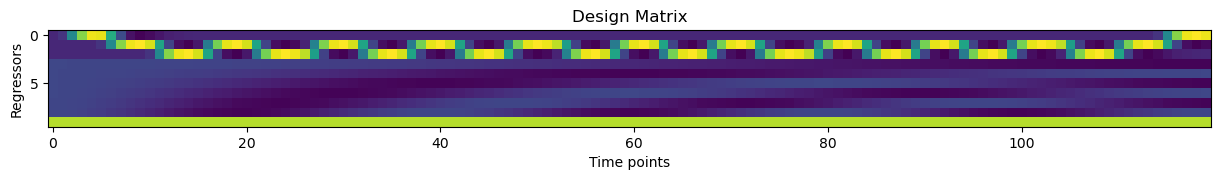

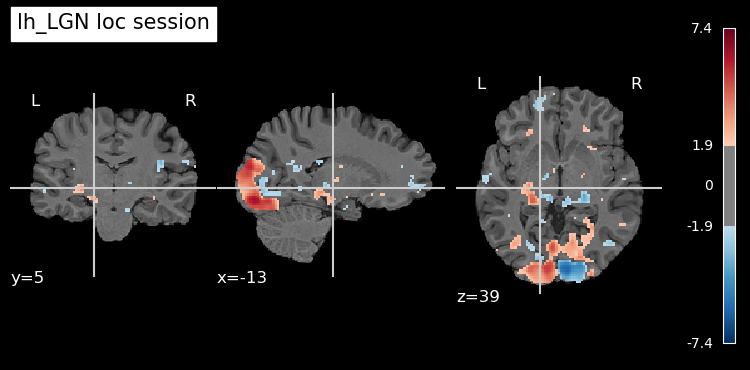

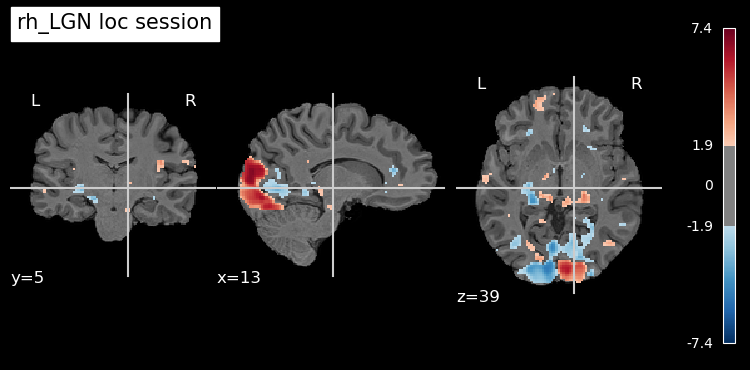

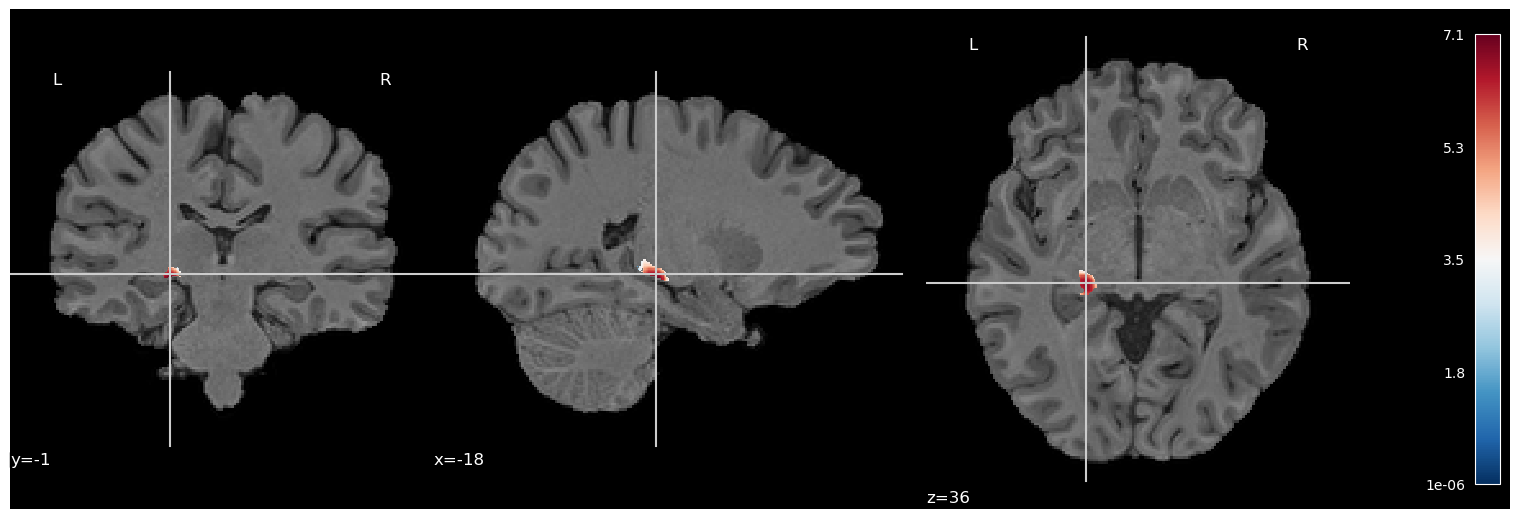

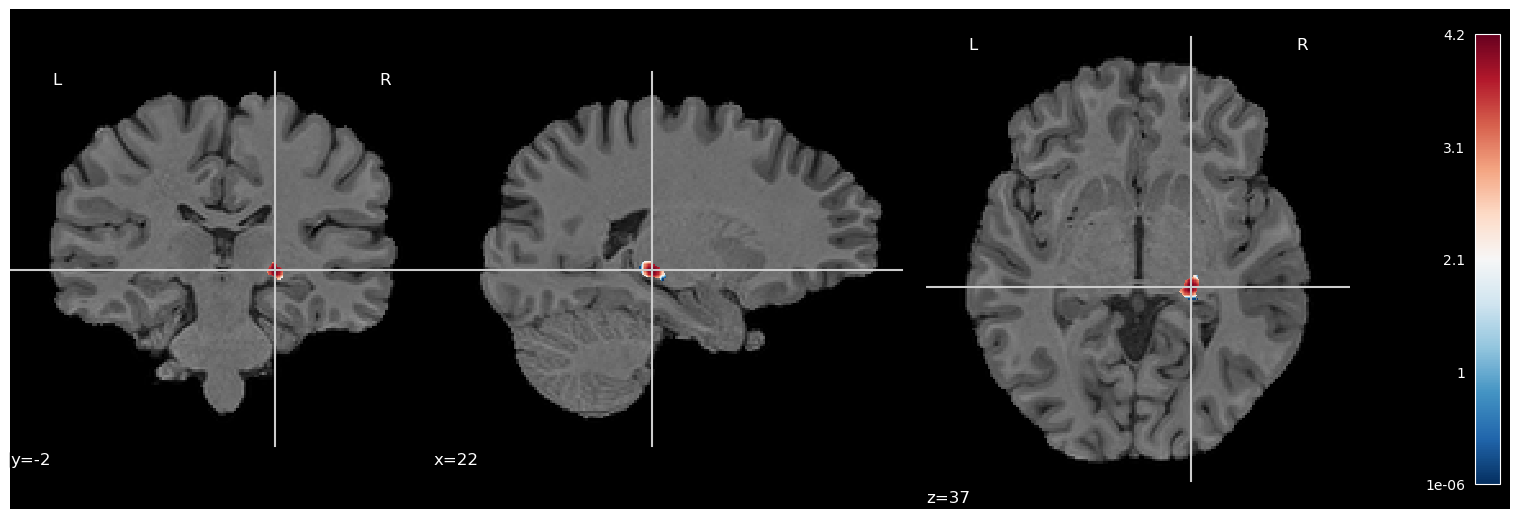

In [120]:
f('spm', 'cosine')

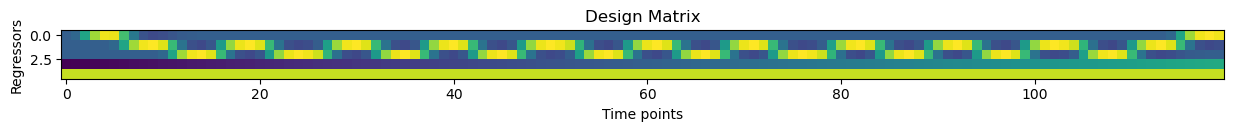

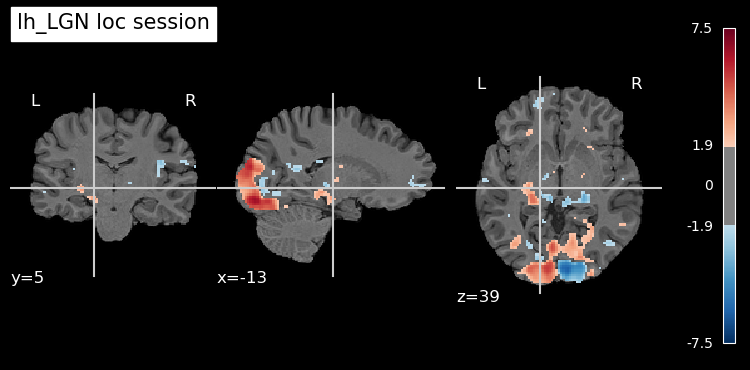

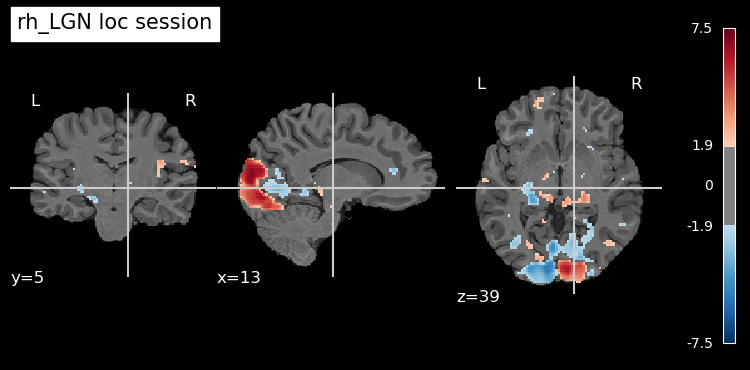

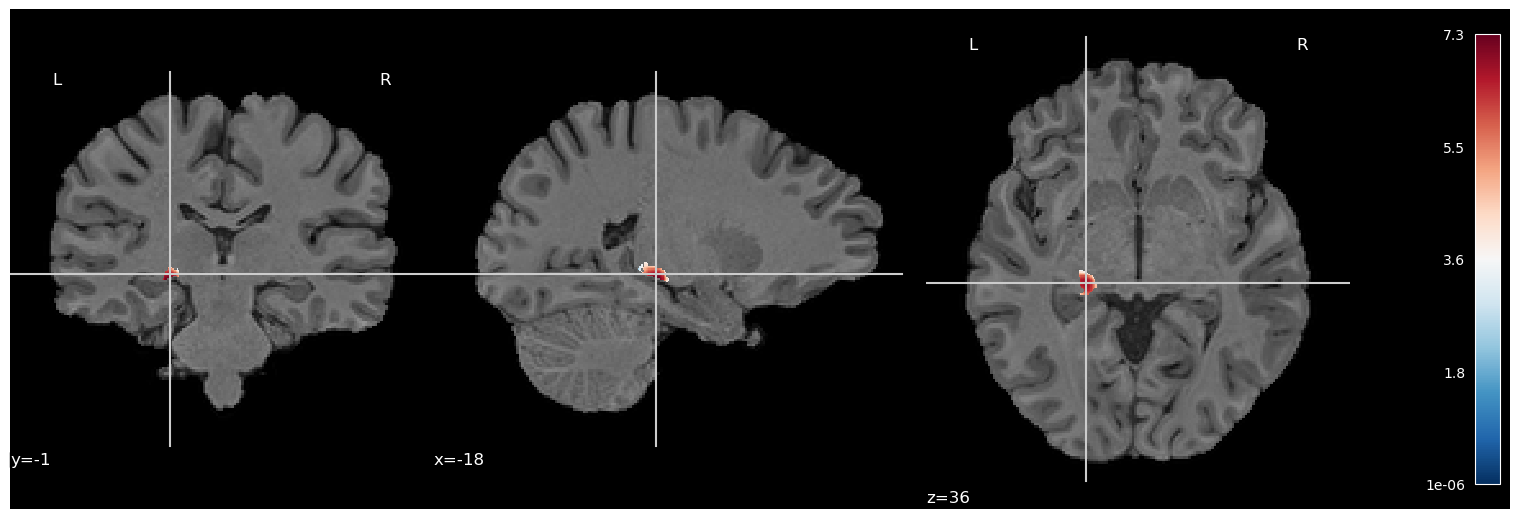

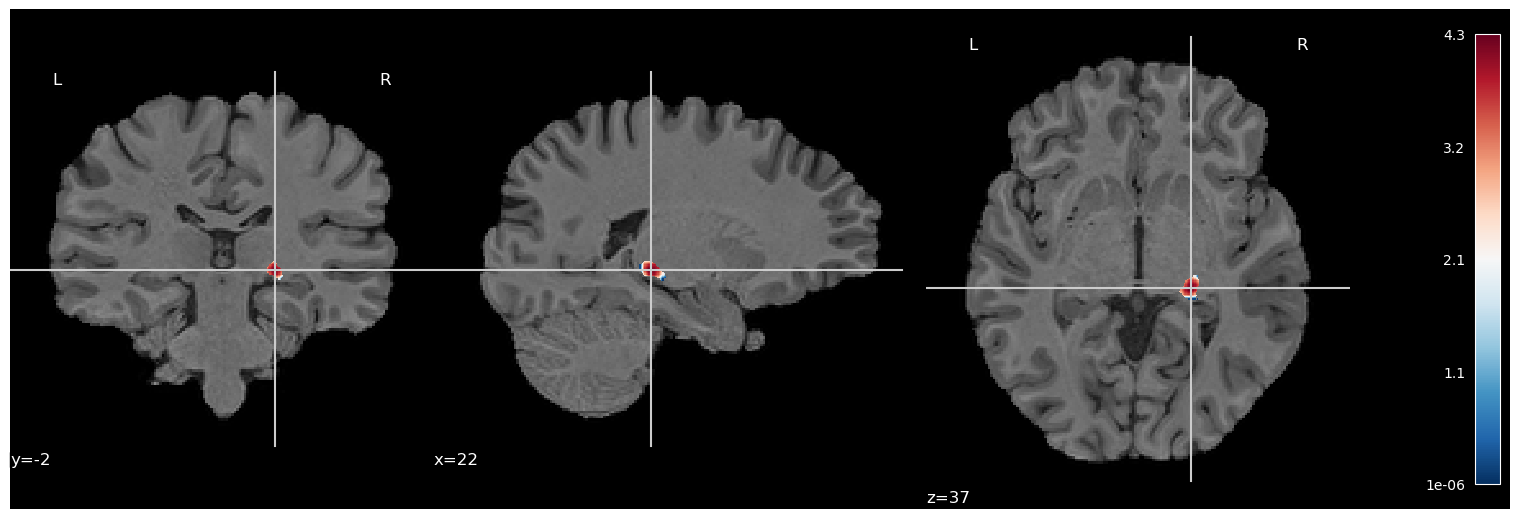

In [124]:
f('spm', 'polynomial')

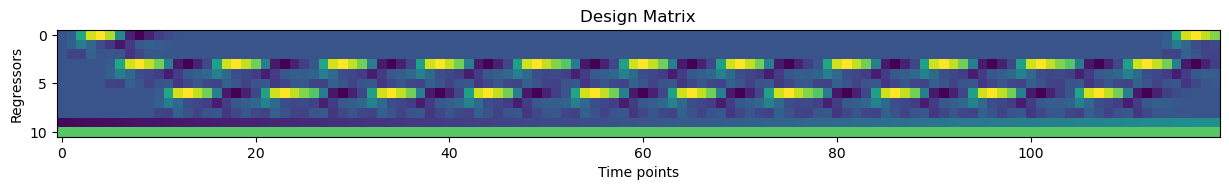

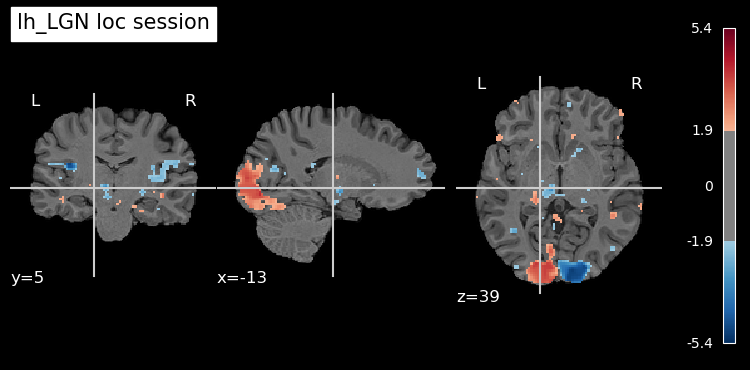

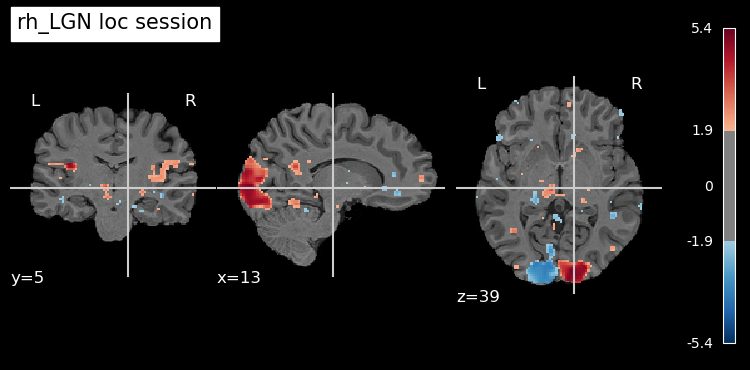

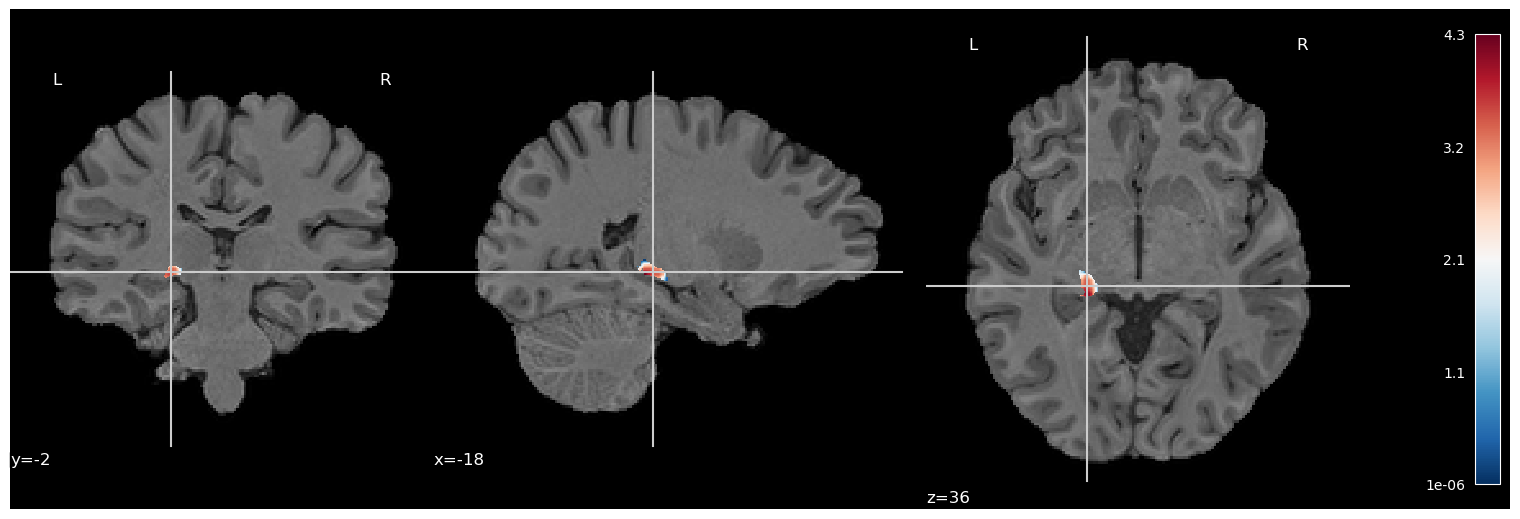

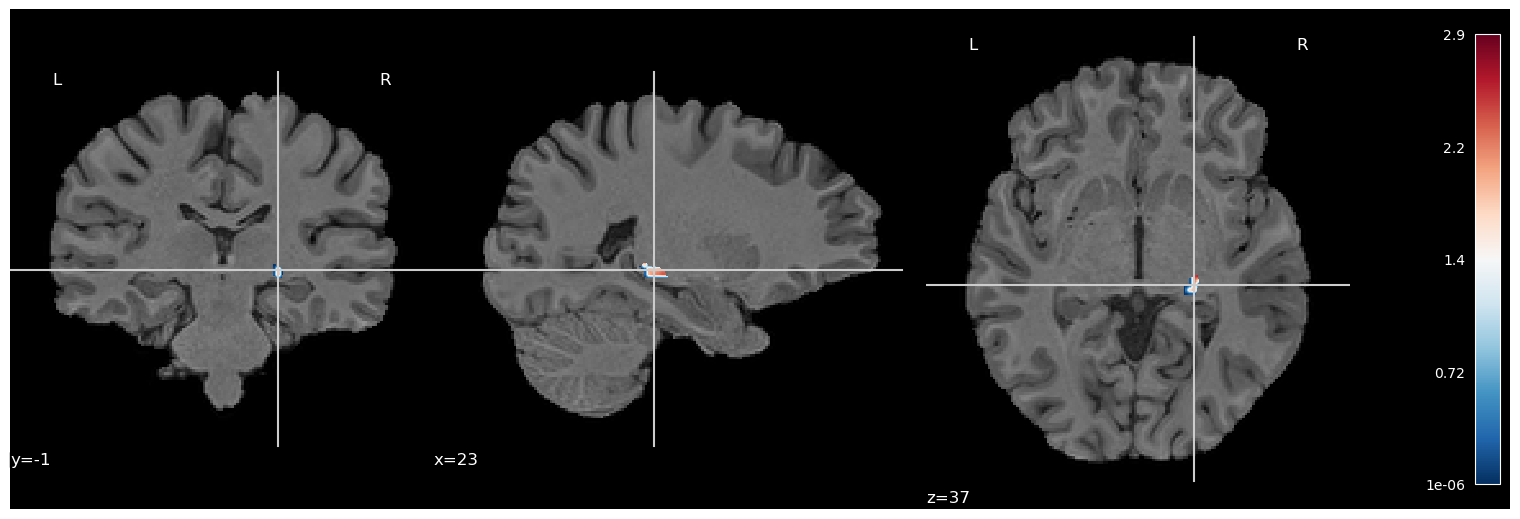

In [129]:
f('glover + derivative + dispersion', 'polynomial')

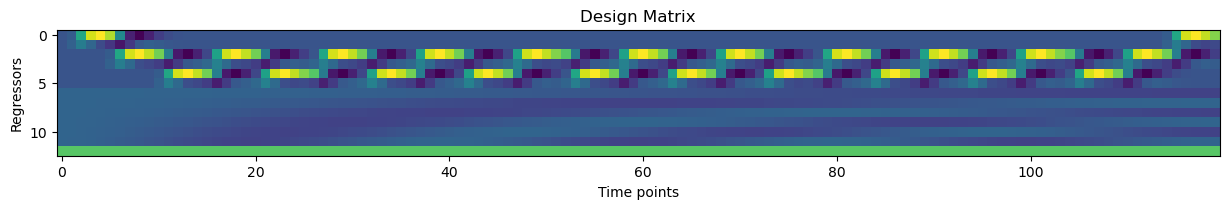

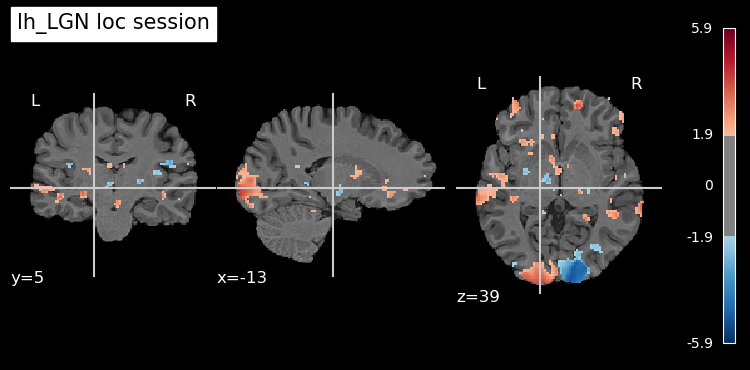

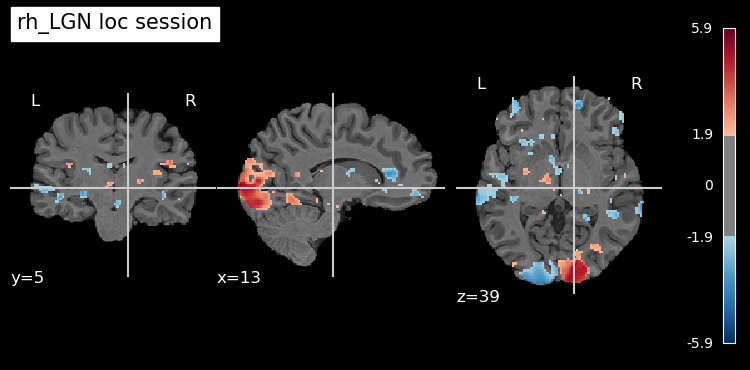

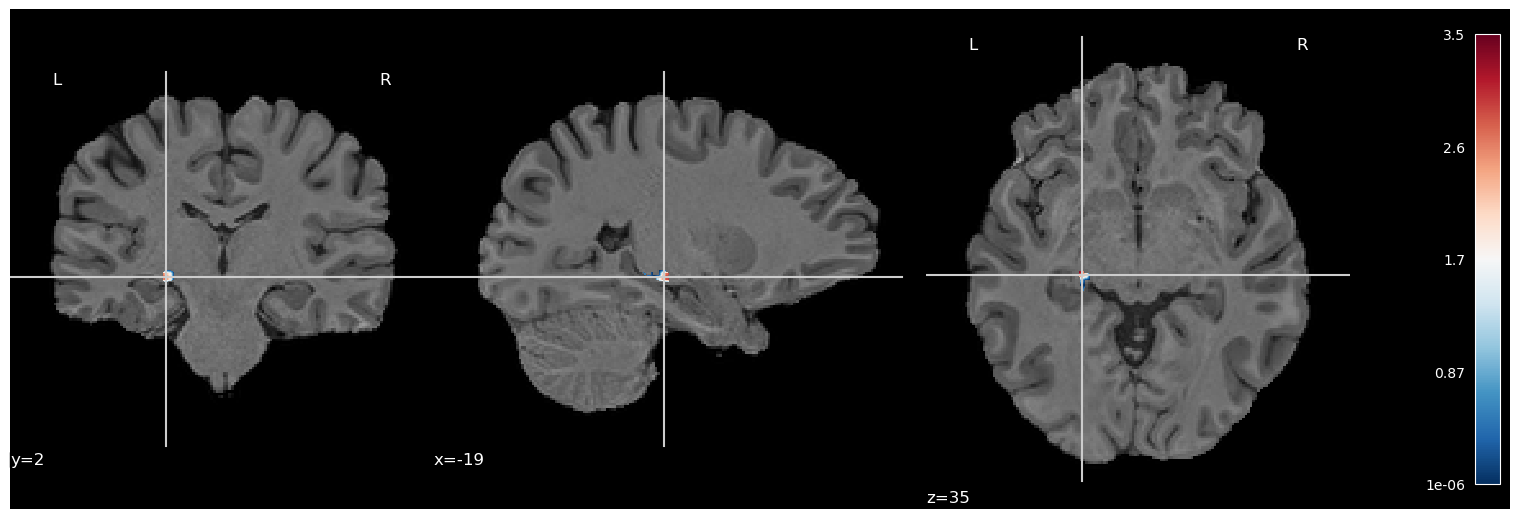

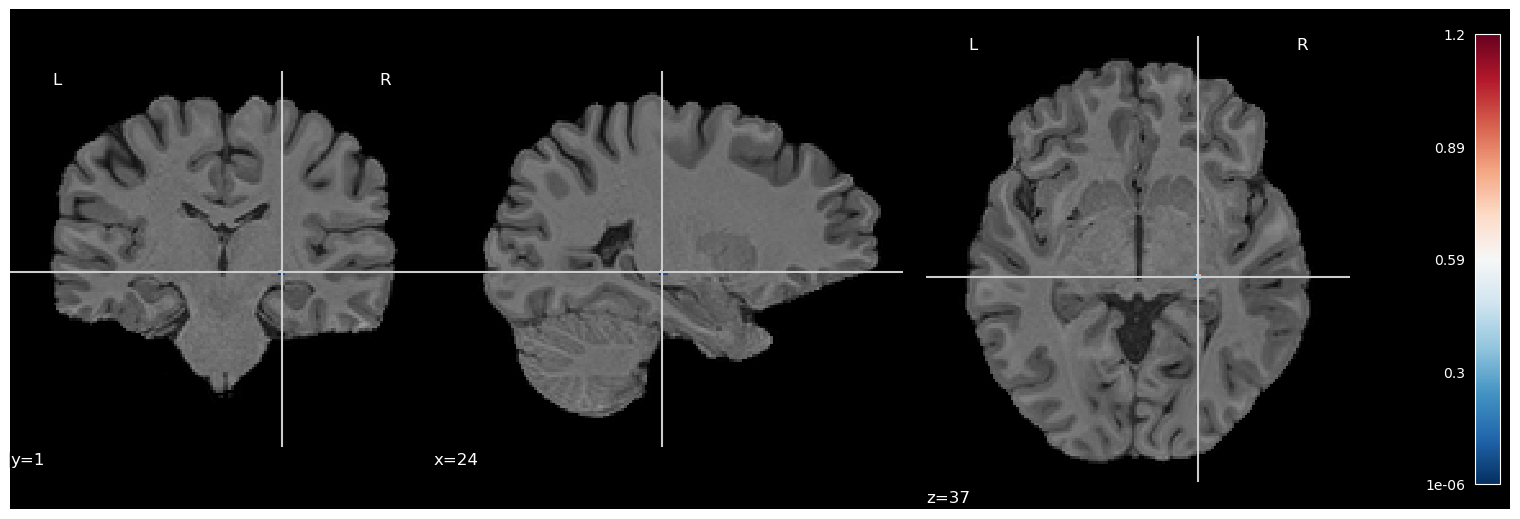

In [130]:
f('glover + derivative', 'cosine')